Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(3 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster?
* The detailed explanation of the logic of the analysis.

**Question 2.**  _(4 points)_
* What attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis? Provide a complete list of all attributes used.
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 3.**  _(4 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation.

**Questions on Quercus.**  _(4 points)_


In [53]:
# Import following Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [54]:
# Upload the train dataset

train_data = pd.read_csv(r'C:\Users\HP Omen\Desktop\Shiya\Data Science\train.csv')

# Definition Key:

survival = Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

Sex = M for Male, F for Female	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	
Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


# Step 1: Understand "Train Data"

In [55]:
train_data.shape

(891, 12)

In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# There are 11 features and one target variable (Survived)

In [58]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
# It shows there are duplicates in the dataset.
# 210 tickets were duplicate
# 57 counts show duplicate cabin #s

train_data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Artagaveytia, Mr. Ramon",male,1601,G6,S
freq,1,577,7,4,644


In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
# Below shows missing values in the dataset:
# AGE has 177 missing values
# CABIN has 687 missing values
# EMBARKED has 2 missing values

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data cleaning and Data Processing

# Few features are dropped from dataset because it doesn't contribute to passenger's survival (e.g. PassengerId, Ticket, Cabin)

In [63]:
train_drop = train_data.drop(['PassengerId', 'Ticket', 'Cabin'], axis =1)

In [64]:
train_drop.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [65]:
train_drop.shape

(891, 9)

# Age - fill Null values: (mean age - standard deviation age) and (mean age + standard deviation age)

# Then, created a new column called  "AgeCat" which categorizes passengers by age.

In [66]:
for dataset in train_drop:
    age_avg = train_drop['Age'].mean()
    age_std = train_drop['Age'].std()
    age_null = train_drop ['Age'].isnull().sum()
    
    random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null)
    train_drop['Age'][np.isnan(train_drop['Age'])] = random_list
    train_drop['Age'] = train_drop['Age'].astype(int)
    

C:\Users\HP Omen\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [67]:

age_cat = pd.cut(train_drop.Age, bins = [0,2,13,17,60,99], labels= ['Infants','children','Young Adults','Adults', 'Elderly'])

age_cat 

0            Adults
1            Adults
2            Adults
3            Adults
4            Adults
           ...     
886          Adults
887          Adults
888    Young Adults
889          Adults
890          Adults
Name: Age, Length: 891, dtype: category
Categories (5, object): [Infants < children < Young Adults < Adults < Elderly]

In [68]:
train_drop.insert(5,"AgeCat", age_cat,)

In [69]:
train_drop.head()

,Survived,Pclass,Name,Sex,Age,AgeCat,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,Adults,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,Adults,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26,Adults,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,Adults,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35,Adults,0,0,8.0500,S


# Fill in missing values for port stations ("Embarked")

In [70]:
# Above learned that "S" Southamptop port has top entry so used that value
train_drop['Embarked'].fillna('S', inplace = True)

In [75]:
# which comfirms that all nulla
train_drop.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Created new catergory "Title" from name and then narrow it down to most common titles.

In [79]:
# Name:
train_drop['Title'] = train_drop.Name.str.extract('([A-Za-z]+)\.')

for data in train_drop:
    train_drop['Title'] = train_drop['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Other')
    train_drop['Title'] = train_drop['Title'].replace('Mlle','Miss')
    train_drop['Title'] = train_drop['Title'].replace('Ms','Miss')
    train_drop['Title'] = train_drop['Title'].replace('Mme','Mrs')
    
print(pd.crosstab(train_drop['Title'],train_drop['Sex']))

Sex     female  male
Title               
Master       0    40
Miss       185     0
Mr           0   517
Mrs        126     0
Other        3    20


In [80]:
train_drop.head()

,Survived,Pclass,Name,Sex,Age,AgeCat,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,Adults,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,Adults,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26,Adults,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,Adults,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35,Adults,0,0,8.0500,S,Mr


# Data Analysis:

# Question 1: 
What categories of passengers were most likely to survive the Titanic disaster?
The detailed explanation of the logic of the analysis.

* There are 11 features (PassengerID,Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked) and one target variable (Survived). Overall, out of 891 passengers, 342 (38.4%) survived and 61.6% dead. Among survived, I would like to understand what categories of passengers had a higher probability of survival.

* Dropped few variables (PassengerId, Ticket, Cabin) because it doesn't contribute to passenger survival rate. The following categories were selected to understand the question above: Pclass, Sex, Embarked. Also, it created additional columns for comparison.

1) Pclass vs Survival rate: calculated the mean survival rate among classes and it resulted in such as : Pclass1 (63%), Pclass2(47%) & Pclass3(24%). It clearly shows that Pclass is contributing to passengers' chance of survival. Therefore, it shows that passengers boarded in Pclass 1 have higher survival chance than others.

2) Sex vs Survival: Among total passengers boarded, 577 were male and 314 female. But, to understand who survived better, took mean values where results show that 74% females survived better than 18% male.

3) Additionally, I created an extra column called “ AgeCat” which group age by following categories (e.g. Infants, children, young adults. Adults & elderly) on survival rate. As you could see in the chart and graph (in the workbook) that females between young adults and adults have a better chance of survival than others. It could be the case where men among those age categories (Young adults to Adults) trying to save women and children first.

4) It also included P-class, Sex, and survival rate. It shows that female passengers in Pclass1 & Pclass2 had a better survival chance. Therefore, the passenger class is directly proportional to the survival rate.

5) Embarked vs Survival rate: It is evident from data that passengers boarded from Cherbourg port survived better than others. Also, compared Pclass with embarked port and it shows that passengers boarded from Cherbourg in Pclass 1 had higher survival rate. And, it is also somewhat true that passenger boarded from Queenstown in Pclass 2 had a better chance of survival too.

6) As a final step, combined Pclass, sex, age & embarked port station. Passengers boarded from Cherbourg in the Pclass 1 between the ages on 20-45 years, regardless gender had better chance of survival. Also, it is somewhat true for passengers boarded from Southampton as well. Whereas, when compared to Queensland, the survival rate was significantly low. It is hard to conclude how the Embarked station has anything to do with the survival rate.




# Question 2: Attributes used in the analysis. 

1)  Firstly, to understand the data, used descriptive analysis.

* In order to begin the analysis, data is cleaned using following methods:
* The following feature columns (PassengerId, Cabin, Tickets) were dropped from DataFrame as it wasn’t serving any purpose for analysis.
* There were missing values in “Age”, “Embarked” & “Cabin” columns in the dataset.
* In order to fill the missing values in the age, used (mean age – standard deviation age) and (mean age + standard deviation age).
* Created new attributes such as “AgeCat” using bin (pd.cut) method. “AgeCat” categorizes passengers into following buckets ( Infants, children, young adults, adults, elderly)
* Embarked columns had missing values as well. On average, most passengers boarded from Southampton station. Therefore, used that value to fill in the missing values.
* Also, created new category called “Title” from name and then narrow it down to the most common titles. 



In [85]:
# First calculate number of survived Vs Dead

Survived = train_drop[train_drop['Survived']==1]
dead = train_drop[train_drop['Survived']==0]
print("Survived:%i (%.1f%%)"%(len(Survived), float(len(Survived))/len(train_drop)*100.0))
print("dead:%i (%.1f%%)"%(len(dead), float(len(dead))/len(train_drop)*100.0))
print("Total:%i"%len(train_drop))

Survived:342 (38.4%)
dead:549 (61.6%)
Total:891


# Out of 891 passengers, 342 (38.4%) survived and 61.6% dead.

# 1: Pclass vs Survived

In [86]:
train_drop.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [87]:
train_drop.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [88]:
mean_Pclass = train_drop[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()
print(mean_Pclass)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


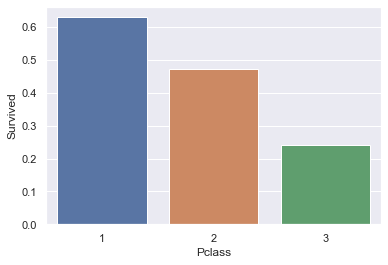

In [89]:
sns.barplot(x='Pclass', y='Survived', data=mean_Pclass)

# Results: It shows that passengers in 'Pclass 1' survived better than others.

# 2: Sex vs Survival

In [90]:
train_drop.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [91]:
train_drop.groupby('Sex').Survived.value_counts()


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [92]:
mean_sex = train_drop[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
print(mean_sex)

      Sex  Survived
0  female  0.742038
1    male  0.188908


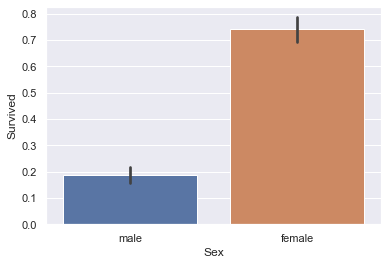

In [93]:
sns.barplot(x ='Sex', y ='Survived', data = train_drop)

# Results : Female passengers had better chance of survival compared to men

# 3: AgeCat vs Survival - 

In [94]:
train_drop.AgeCat.value_counts()

Adults          739
Young Adults     59
children         47
Elderly          22
Infants          17
Name: AgeCat, dtype: int64

In [95]:
train_drop.groupby('AgeCat').Survived.value_counts()

AgeCat        Survived
Infants       0             9
              1             8
children      1            27
              0            20
Young Adults  0            33
              1            26
Adults        0           470
              1           269
Elderly       0            17
              1             5
Name: Survived, dtype: int64

In [96]:
mean_agecat = train_drop[['AgeCat', 'Survived']].groupby(['AgeCat'], as_index = False).mean()
print(mean_agecat)

         AgeCat  Survived
0       Infants  0.470588
1      children  0.574468
2  Young Adults  0.440678
3        Adults  0.364005
4       Elderly  0.227273


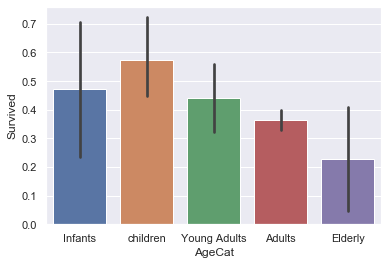

In [97]:
sns.barplot( x = 'AgeCat', y = 'Survived', data = train_drop)

# AgeCat, Sex vs Survived

In [98]:
agecat_survived = train_drop.pivot_table('Survived', columns = 'Sex', index = 'AgeCat', aggfunc="sum")
agecat_survived

Sex,female,male
AgeCat,,
Infants,4,4
children,15,12
Young Adults,23,3
Adults,186,83
Elderly,3,2


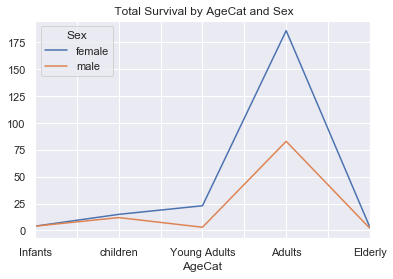

In [99]:
agecat_survived.plot(title = " Total Survival by AgeCat and Sex", figsize=(6,4));

In [100]:
# to understand the relationship between passenger class, sex and survival rate.

t_combined = pd.crosstab(train_drop['Pclass'],train_drop['Sex'])
print(t_combined)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


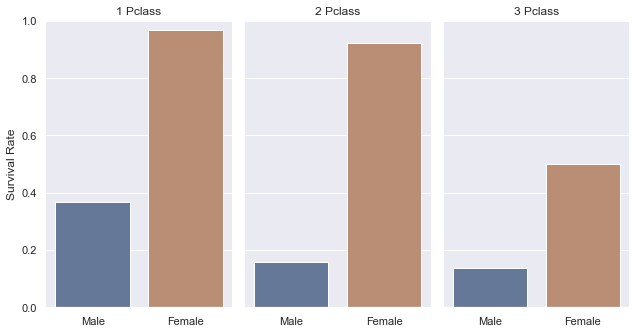

In [101]:
t_combined = sns.catplot(x="Sex", y="Survived", col="Pclass",data=train_drop, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(t_combined .set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Male", "Female"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True)) 

# Results:  Passenger class is directly propotional to survival rate. Also, sex is directly propotional to survival as well. This may be due to that female and children were saved first (refer above graph: AgeCat vs Survival)

# 4: Embarked vs Survival Rate

In [102]:
train_drop.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [103]:
train_drop.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

In [104]:
train_drop[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


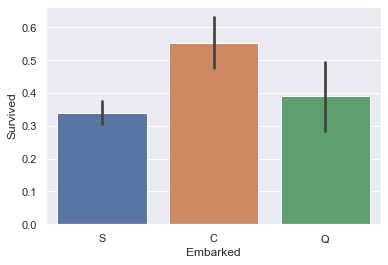

In [105]:
sns.barplot(x ='Embarked', y = 'Survived', data = train_drop)

In [106]:
p_combined = pd.crosstab(train_drop['Pclass'],train_drop['Embarked'])
print(p_combined)

Embarked   C   Q    S
Pclass               
1         85   2  129
2         17   3  164
3         66  72  353


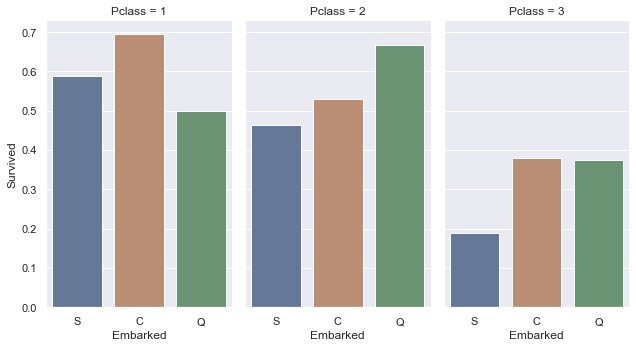

In [107]:
p_combined = sns.catplot(x="Embarked", y="Survived", col="Pclass",data=train_drop, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(t_combined .set_axis_labels("", "Survival Rate")
  .set_xticklabels(["C", "Q", "S"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True)) 

# Results : Overall, passengers from Cherbourg stations survived better than others. 

# Let's consider Pclass Vs Embarked ports 

# Passengers board from Cherbourg + Pclass 1 had better survival


# 5 : Combine Pclass, Sex, Age, Embarked

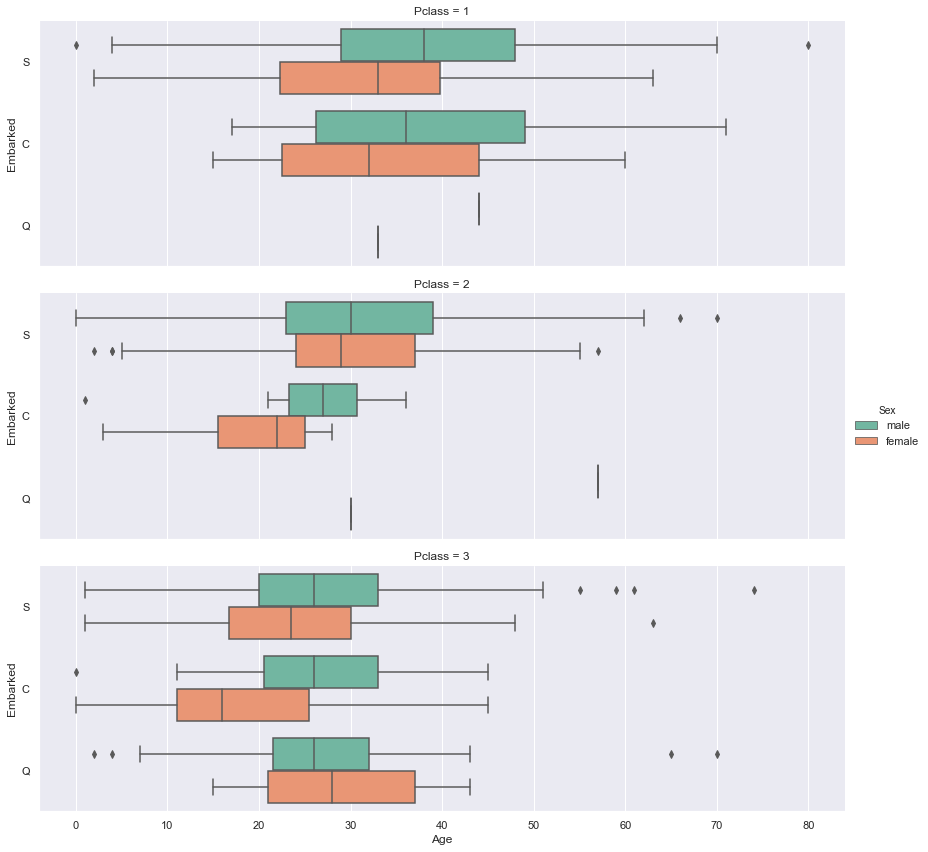

In [108]:
all_combined = sns.catplot (x="Age", y="Embarked",
                hue="Sex", row="Pclass",
                data=train_drop[train_drop.Embarked.notnull()],
                orient="h", height=4, aspect=3, palette="Set2",
                kind="box")